In [6]:
#Importing needed modules .
from shutil import copyfile ,rmtree
from random import sample
from tensorflow.keras.preprocessing.image import load_img ,ImageDataGenerator
import os

In [7]:
#function for creating base folders for generating .
def base_paths(path)->None :
    '''function docstring'''
    if 'ready_to_gen' in os.listdir(path) :
        rmtree(f'{path}\\ready_to_gen')
    os.mkdir(f'{path}\\ready_to_gen')
    os.mkdir(f'{path}\\ready_to_gen\\train')
    os.mkdir(f'{path}\\ready_to_gen\\valid')

In [8]:
#function for splitting pictures to train and valid .
def Split_data(base,target,split_size)->None:
    '''function docstring'''
    idx = (split_size*len(os.listdir(base)))//100
    selected_pic = sample(os.listdir(base),idx)
    lbl = base.split("\\")[-1]
    os.mkdir(f'{target}\\train\\{lbl}')
    os.mkdir(f'{target}\\valid\\{lbl}')
    for pic in os.listdir(base) :
        try :
            test_case = load_img(f'{base}\\{pic}')
            if pic in selected_pic :
                copyfile(f'{base}\\{pic}',f'{target}\\train\\{lbl}\\{pic}')
            else :
                copyfile(f'{base}\\{pic}',f'{target}\\valid\\{lbl}\\{pic}')
        except :
            print('zero length found .')

In [9]:
#Applying two above functions .
base_paths("D:\\datasets\\Animals_classification")
size = int(input('Enter train size :'))
for folder in os.listdir("D:\\datasets\\Animals_classification\\raw-img") :
    Split_data(f'D:\\datasets\\Animals_classification\\raw-img\\{folder}'
              ,'D:\\datasets\\Animals_classification\\ready_to_gen'
              ,size)
    print('%s folder splited .'%(folder))

Enter train size :90
cane folder splited .
cavallo folder splited .
elefante folder splited .
farfalla folder splited .
gallina folder splited .
gatto folder splited .
mucca folder splited .
pecora folder splited .
ragno folder splited .
scoiattolo folder splited .


In [10]:
#Getting instance of generator .
train_gen = ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
valid_gen = ImageDataGenerator(rescale=1/255)

In [12]:
#Generating photos .
ready_train = valid_gen.flow_from_directory("D:\\datasets\\Animals_classification\\ready_to_gen\\train",target_size=(150,150),batch_size=235)
ready_valid = valid_gen.flow_from_directory("D:\\datasets\\Animals_classification\\ready_to_gen\\valid",target_size=(150,150),batch_size=52)

Found 23556 images belonging to 10 classes.
Found 2623 images belonging to 10 classes.


In [13]:
from tensorflow.keras import layers ,Model , models
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import RMSprop 

In [18]:
#Defining the model .
pre_trained_model = InceptionV3(include_top=False , input_shape = (150,150,3))
for layer in pre_trained_model.layers :
    layer.trainable = False
last_l = pre_trained_model.get_layer('mixed7')
out = last_l.output
x = layers.Flatten()(out)
x = layers.Dense(64,activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(10,activation='softmax')(x)
model = Model(pre_trained_model.input,x)
model.compile(optimizer=RMSprop(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
#datas training .
history = model.fit(ready_train,epochs=5,validation_data = ready_valid)

Epoch 1/5
101/101 [==============================] - 442s 4s/step - loss: 0.7868 - accuracy: 0.7930 - val_loss: 0.3174 - val_accuracy: 0.8982
Epoch 2/5
101/101 [==============================] - 336s 3s/step - loss: 0.2588 - accuracy: 0.9166 - val_loss: 0.2600 - val_accuracy: 0.9177
Epoch 3/5
101/101 [==============================] - 345s 3s/step - loss: 0.1527 - accuracy: 0.9485 - val_loss: 0.3257 - val_accuracy: 0.9070
Epoch 4/5
101/101 [==============================] - 346s 3s/step - loss: 0.0983 - accuracy: 0.9665 - val_loss: 0.2920 - val_accuracy: 0.9173
Epoch 5/5
101/101 [==============================] - 345s 3s/step - loss: 0.0666 - accuracy: 0.9788 - val_loss: 0.2683 - val_accuracy: 0.9249


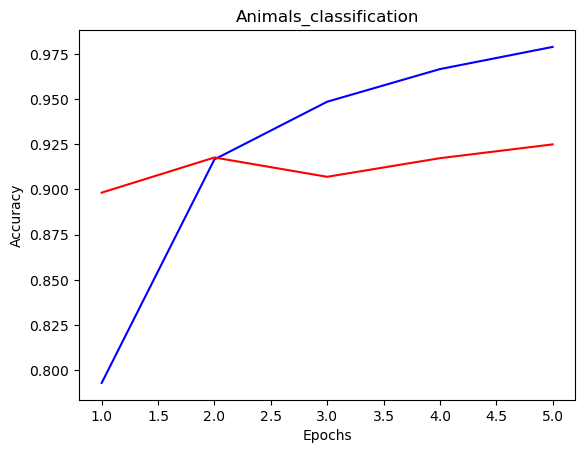

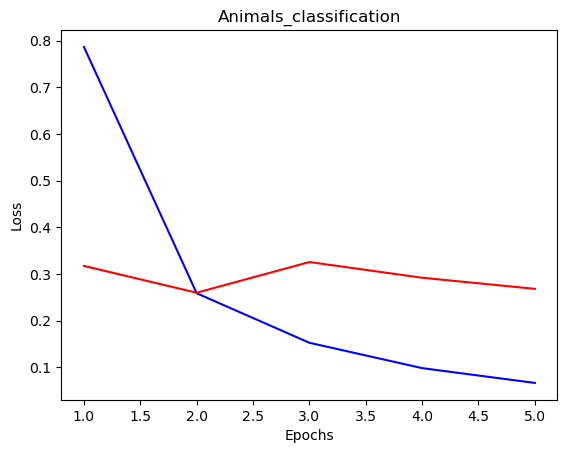

In [20]:
#Visualize models performance
import matplotlib.pyplot as plt
epoch = range(1,6)
results = history.history
plt.plot(epoch,results['accuracy'],'blue')
plt.plot(epoch,results['val_accuracy'],'red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Animals_classification')
plt.show()
plt.plot(epoch,results['loss'],'blue')
plt.plot(epoch,results['val_loss'],'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Animals_classification')
plt.show()